In [1]:
# setup python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from cvxpy import *

In [2]:
# plot properties
# use to create figures for tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

In [3]:
# generate data
np.random.seed(1)
m = 0.6
b = 0.3
sigma = .1
x = np.linspace(0,1,10)
y = m*x + b + sigma*np.random.standard_normal(x.shape)

# compute range for plotting
axis_range = [-0.1,1.1,-0.1,1.1]

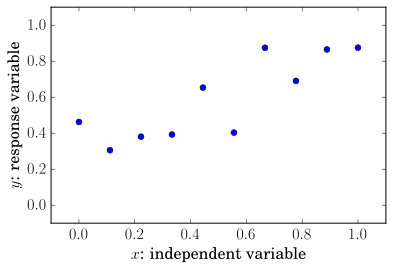

In [4]:
# plot the figure
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/1d-fit-1.pdf')

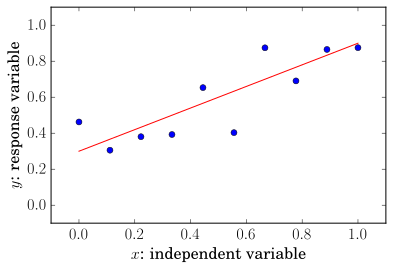

In [5]:
# plot figure with true line
y_true = m*x + b

plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y_true,'r')

plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/1d-fit-2.pdf')

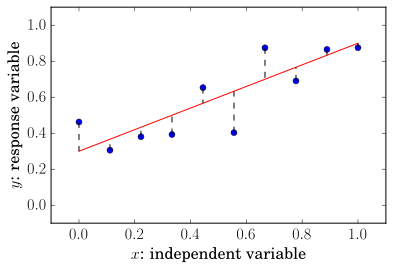

In [6]:
# plot figure with true line and distance
y_true = m*x + b

plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y_true,'r')

for i in range(x.size):
    plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--')
    
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/1d-fit-3.pdf')

In [7]:
# solve via numpy covariance function
A = np.vstack((x,y))
V = np.cov(A)
m_est = V[0,1] / V[0,0]
b_est = (y.sum() - m_est*x.sum()) / len(x)
print('m_est = {}'.format(m_est))
print('b_est = {}'.format(b_est))

m_est = 0.566036432757
b_est = 0.307267694541


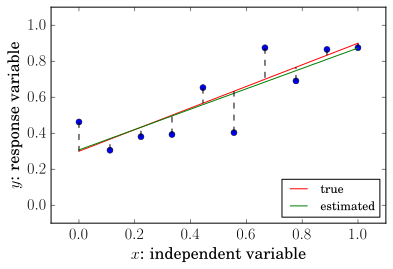

In [8]:
# plot figure with true and estimated model
y_true = m*x + b
y_est = m_est*x + b_est

plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y_true,'r',label='true')
plt.plot(x,y_est,'g',label='estimated')

for i in range(x.size):
    plt.plot([x[i],x[i]],[y[i],y_true[i]],'k--')
    
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=4,fontsize=12)
plt.axis(axis_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/1d-fit-4.pdf')

In [9]:
# Construct the problem.
m_cvx = Variable()
b_cvx = Variable()
objective = Minimize(sum_squares(m_cvx*x + b_cvx - y))
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()

# print the parameters
print('m_cvx.value = {:.5}, b_cvx.value = {:.5}'.format(m_cvx.value,b_cvx.value))

m_cvx.value = 0.56604, b_cvx.value = 0.30727


In [10]:
# use cvxpy for linear least squares in matrix form

# regenerate data
np.random.seed(1)
slope = 0.6; intercept = 0.3; sigma = .1; n = 10 # number of data points
input_data = np.linspace(0,1,n)
response_data = slope*input_data + intercept + sigma*np.random.standard_normal(n)

# problem data
A = np.vstack([input_data,np.ones(n)]).T
b = response_data

# cvx problem
x = Variable(A.shape[1])
objective = Minimize(sum_squares(A*x - b))
prob = Problem(objective)
result = prob.solve()

# get value
x_star = np.array(x.value)

print('slope = {:.4}, intercept = {:.4}'.format(x_star[0,0],x_star[1,0]))

slope = 0.566, intercept = 0.3073
